# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Propósito y acciones del proyecto

**Lecutra de datos:**  
Utilizare los métodos de pandas. Los archivos son csv asi que utilizare la función read_csv(). Examinare los archivos para ver que se hayan leido correctamente, en caso contrario aplicare los argumentos necesarios para una lectura correcta del archivo.

**Preprocesamiento de datos:**  
- **Limpieza de datos (eliminar duplicados, eliminar o rellenar valores ausentes):**  
Para encontrar los duplicados explicitos, aquellos que con tienen filas completamente duplicadas, utilizare duplicated().sum().
Relleare valores ausentes de acuerdo a la causa. Utilizare fillna() para rellenar y isna() para encontrarlos.

- **Conversión del tipo de dato:**  
Aquellas columnas que contengan valores con un tipo de dato incorrecto seran cambiadas con el método astype(). 
Los mas comunes son: float a int, object a categorico, object a datatime para realizar calculos con el tiempo.

- **Para cada usuario encontrar**:  
   - **El número de llamadas realizadas y minutos utilizados al mes:**  
   Utilizare métodos de suma y conteo como sum() y count() aplicados  la columna correspondiente. 
   - **La cantidad de los SMS enviados por mes.**  
   Utilizare métodos de conteo como count() aplicados a la columna correspondiente.
   - **El volumen de datos por mes.**  
   Utilizare métodos de suma como sum() aplicados  la columna correspondiente.
   - **Los ingresos mensuales por cada usuario. Para ello, necesitas:**  
       - **Restar el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos.**    
       Despues de filtrar el dataframe y crear un dataframe con el número de llamadas, mensajes de texto
       y datos usados por el usuario. Condicionare, si cada servicio individual excede el paquete gratuito, 
       se realizara una resta para obtener el excedente correspondiente. Se utilizara el dataframe creado
       y aquel que contenga las tarifas.
       - **Multiplicar el resultado por el valor de la tarifa de llamadas.**    
       De igual forma se utilizara el dataframe creado con los excedentes del paquete gratuito y se multiplicara
       por el valor indicado en el dataframe de las tarifas. 
       - **Añadir la cuota mensual en función del plan de llamadas.**    
       Se creara una nueva columna con el total. 
       
**Analizar los datos**  
- **Describe el comportamiento de la clientela:**  
    - **Encuentra los minutos, SMS y volumen de datos que requieren los usuarios de cada tarifa por mes.**  
    Agrupare con groupby() por mes y tarifa. Dependiendo del caso lo combinare con sum() o count(). 
    - **Calcula la media, la varianza y la desviación estándar.**  
    Me apoyare de las funciones mean(), var() de la líbreria numpy, sigma puedo usar math.sqrt(varianza). 
    - **Traza histogramas. Describe las distribuciones.**  
    Graficare con la funcion plot. Agregare los argumentos necesarios para que sea legible.
    
**Prueba las hipótesis**  

- **El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere.**  
- **El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de          otras regiones.**  
Utilizare una prueba estadistica t student. Para ver si las medias son significativamente diferentes. Esto con la libreria scipy-stats. Generare un hipotesis nula, una alternativa y definire un nivel de significancia.


## Diccionario de datos
1. La tabla `users` (datos sobre los usuarios):
 
- *user_id*: identificador único del usuario.
- *first_name*: nombre del usuario.
- *last_nam*e: apellido del usuario.
- *age*: edad del usuario (en años).
- *reg_date*: fecha de suscripción (dd, mm, aa).
- *churn_date*: la fecha en la que el usuario dejó de usar el servicio (si el valor es ausente, la tarifa se estaba usando cuando fue extraída esta base de datos).
- *city*: ciudad de residencia del usuario.
- *plan*: nombre de la tarifa.

2. La tabla `calls` (datos sobre las llamadas):
 
- *id*: identificador único de la llamada.
- *call_date*: fecha de la llamada.
- *duration*: duración de la llamada (en minutos).
- *user_id*: el identificador del usuario que realiza la llamada.

3. La tabla `messages` (datos sobre los SMS):
 
- *id*: identificador único del SMS.
- *message_date*: fecha del SMS.
- *user_id*: el identificador del usuario que manda el SMS.

4. La tabla `internet` (datos sobre las sesiones web):
 
- *id*: identificador único de la sesión.
- *mb_used*: el volumen de datos gastados durante la sesión (en megabytes).
- *session_date*: fecha de la sesión web.
- *user_id*: identificador del usuario.

5. La tabla `plans` (datos sobre las tarifas):
 
- *plan_name*: nombre de la tarifa.
- *usd_monthly_fee*: pago mensual en dólares estadounidenses.
- *minutes_included*: minutos incluidos al mes.
- *messages_included*: SMS incluidos al mes.
- *mb_per_month_included*: datos incluidos al mes (en megabytes).
- *usd_per_minute*: precio por minuto tras exceder los límites del paquete (por ejemplo, si el paquete incluye 100 minutos, el operador cobrará el minuto 101).
- *usd_per_message*: precio por SMS tras exceder los límites del paquete.
- *usd_per_gb*: precio por gigabyte de los datos extra tras exceder los límites del paquete (1 GB = 1024 megabytes).

## Inicialización de librerías

In [1]:
from scipy import stats as st 
import math as mt 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 

## Cargar datos

Ubicación de los archivos: 
- **calls:** ../datasets/megaline_calls.csv 
- **internet:** ../datasets/megaline_internet.csv
- **messages:** ../datasets/megaline_messages.csv 
- **plans:** ../datasets/megaline_plans.csv 
- **users:** ../datasets/megaline_users.csv 

In [2]:
df_users = pd.read_csv('../datasets/megaline_users.csv') # Lectura del dataframe users (usuarios)
df_calls = pd.read_csv('../datasets/megaline_calls.csv') # Lectura del dataframe calls (llamadas)
df_messages = pd.read_csv('../datasets/megaline_messages.csv') # Lectura del dataframe messages (mensajes)
df_internet = pd.read_csv('../datasets/megaline_internet.csv') # Lectura del dataframe internet (internet)
df_plans = pd.read_csv('../datasets/megaline_plans.csv') # Lectura del dataframe plans (tarifas)

# Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


**Notas**

- El dataframe no contiene valores ausentes. 
- Los nombres de las columnas contienen un correcto uso de minúsculas, snake case y son nombres descriptivos.
- Con excepción de la columna plan_name, los tipos de datos son correctos. Creo que podemos cambiar el tipo de dato de la columna plan_name por tipo categórico en vez de un string con apoyo de la método astype(). 
- Podrían cambiarse las columnas usd_per_message a cents_per_message para tener valores int en vez de flotantes. Pero no se si eso complicara los calculos en el futuro. 
- Hay 8 columnas y 2 filas. 

### Corregir datos

In [5]:
# Cambiar el tipo de datos de la columna plan_name de string a categórico
df_plans['plan_name'] = df_plans['plan_name'].astype('category')

# Verificar que el tipo de dato haya sido cambiado 
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   messages_included      2 non-null      int64   
 1   mb_per_month_included  2 non-null      int64   
 2   minutes_included       2 non-null      int64   
 3   usd_monthly_pay        2 non-null      int64   
 4   usd_per_gb             2 non-null      int64   
 5   usd_per_message        2 non-null      float64 
 6   usd_per_minute         2 non-null      float64 
 7   plan_name              2 non-null      category
dtypes: category(1), float64(2), int64(5)
memory usage: 366.0 bytes


In [6]:
# Añadir una columna con los gb incluidos en vez de mb para futuros calculos.
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included'] / 1024
df_plans['gb_per_month_included'] = df_plans['gb_per_month_included'].astype('int')
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprime una muestra de datos para usuarios
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


**Notas**

- Las columnas tienen un nombre apropiado: minúsculas, snake_case  y el nombre es descriptivo. 
- La columna reg_date contiene valores de tipo str, al ser fechas pueden cambiarse por datatime para manipular los datos mas fácil. 
- `Churn_date` contiene 34 valores de 500, es importante verificar la razón. 
- `plan` es de tipo str lo cambiare por category. Me apoyare del método astype(). 
- `churn_date` es de tipo str cuando debería ser datetime. Me apoyare del método to_datetime(). Tambien es necesario eliminar los valores ausentes. Me apoyare del método fillna().
- Hay 8 columnas y 500 filas. 

### Corregir los datos

In [9]:
# Encontrar filas totalmente duplicadas
df_users.duplicated().sum()

0

In [10]:
# Cambiar el tipo de dato de la columna reg_date de str a datatime
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
# Cambiar el tipo de dato de la columna churn_date de str a datatime
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])
# Cambiar nombre de la columna plan a tipo category 
df_users['plan'] = df_users['plan'].astype('category')
# Verificar el cambio
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    category      
 7   churn_date  34 non-null     datetime64[ns]
dtypes: category(1), datetime64[ns](2), int64(2), object(3)
memory usage: 28.1+ KB


In [11]:
# Verificar los cambios
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


### Enriquecer los datos

In [12]:
# Añadir una columna que indique si la persona no ha cancelado el plan 
df_users['is_plan_active'] = ~df_users['churn_date'].isna()

# Añadir una columna que contenga el número de días con el plan activo
df_users['days_with_play_active'] = df_users['churn_date'] - df_users['reg_date']

# Añadir una columna que indique el mes
df_users['month']=df_users['reg_date'].dt.month

# Verificar los cambios
df_users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,is_plan_active,days_with_play_active,month
46,1046,Beata,Hooper,67,"Boston-Cambridge-Newton, MA-NH MSA",2018-02-19,surf,NaT,False,NaT,2
68,1068,Marcel,Jimenez,47,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-29,surf,NaT,False,NaT,1
382,1382,Luci,Kidd,49,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-06-22,ultimate,NaT,False,NaT,6
153,1153,Kathaleen,Crawford,30,"Bridgeport-Stamford-Norwalk, CT MSA",2018-06-19,surf,NaT,False,NaT,6
192,1192,Korey,Goodwin,36,"Buffalo-Cheektowaga, NY MSA",2018-10-02,surf,NaT,False,NaT,10
69,1069,Dino,Fry,31,"Houston-The Woodlands-Sugar Land, TX MSA",2018-09-17,ultimate,NaT,False,NaT,9
401,1401,Charmain,Bryant,67,"Richmond, VA MSA",2018-08-24,ultimate,NaT,False,NaT,8
452,1452,Miguel,Sparks,32,"Tucson, AZ MSA",2018-12-29,surf,NaT,False,NaT,12
25,1025,Jess,Wilkinson,64,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-10-28,ultimate,NaT,False,NaT,10
41,1041,Drucilla,Lynn,58,"Las Vegas-Henderson-Paradise, NV MSA",2018-03-17,ultimate,NaT,False,NaT,3


## Llamadas

In [13]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [14]:
# Imprime una muestra de datos para las llamadas
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


**Notas**

- La columna id parece una composición del user_id mas un identificador de la llamada, separados por un guión bajo. 
- No hay valores ausentes.
- Cambio del nombre de la columna `duration` por `duration_minutes` con el método rename. 
- Nombres en minúsculas y snake case. 
- Cambio del tipo de dato de `call_date` de str a datetime con el método to_datetime().
- Añadir una columna con la duración en minutos redoneada hacia arriba. Para redondear hacia arriba se utiliza una función de la librería math llamada ceil().

### Corregir los datos

In [15]:
# Encontrar filas duplicadas
df_calls.duplicated().sum()

0

In [16]:
# Cambio del nombre de la columna duration por duration_minutes
df_calls.rename(columns={'duration':'duration_minutes'},inplace=True)

# Cambio del tipo de dato de la columna call_date de str a datetime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])

# Verificar el cambio
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                137735 non-null  object        
 1   user_id           137735 non-null  int64         
 2   call_date         137735 non-null  datetime64[ns]
 3   duration_minutes  137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

In [17]:
# Crear columnas individuales para el día, mes y año a partir de la columna call_date
# No es necesario el año al ser el mismo para todos los datos
df_calls['day'] = df_calls['call_date'].dt.day
df_calls['month'] = df_calls['call_date'].dt.month

# Añadir una nueva columna con la duración en minutos redondeada hacia arriba
df_calls['duration_minutes_rounded'] = df_calls['duration_minutes'].apply(mt.ceil)

# Verificar los cambios
df_calls.head()

,id,user_id,call_date,duration_minutes,day,month,duration_minutes_rounded
0,1000_93,1000,2018-12-27,8.52,27,12,9
1,1000_145,1000,2018-12-27,13.66,27,12,14
2,1000_247,1000,2018-12-27,14.48,27,12,15
3,1000_309,1000,2018-12-28,5.76,28,12,6
4,1000_380,1000,2018-12-30,4.22,30,12,5


## Mensajes

In [18]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [19]:
# Imprime una muestra de datos para los mensajes
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


**Notas**

- La columna id parece una composición del user_id + un identificador del mensaje, separados por un guión bajo. 
- Se puede cambiar el tipo de dato de la columna `message_date` de str a datetime. 
- No hay valores ausentes. 
- Los nombres de las columnas cumplen con estar en minúsculas, uso de snake case y son descriptivos. 
- Hay 3 columnas, y 76051 filas. 

### Corregir los datos

In [20]:
# Verificar que no haya filas totalmente duplicadas.
df_messages.duplicated().sum()

0

In [21]:
# Cambiar el tipo de dato de la columna message_date de str a datetime
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])

# Verficiar los cambios
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

In [22]:
# Dividir la columna de la fecha en 3 columnas que correspondan al día, mes y año.
# No es necesario el año al ser el mismo en todos los años.
df_messages['day'] = df_messages['message_date'].dt.day
df_messages['month'] = df_messages['message_date'].dt.month

# Verificar los cambios
df_messages.head()

,id,user_id,message_date,day,month
0,1000_125,1000,2018-12-27,27,12
1,1000_160,1000,2018-12-31,31,12
2,1000_223,1000,2018-12-31,31,12
3,1000_251,1000,2018-12-27,27,12
4,1000_255,1000,2018-12-26,26,12


## Internet

In [23]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [24]:
# Imprime una muestra de datos para el tráfico de internet
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


**Notas**

- Columnas descriptivas con uso de minúsculas y snake_case.
- La columna id es una composición del user_id y un identificador de sesión de internet, separados por un guión bajo. 
- No hay valores ausentes. 
- La columna session_date tiene el tipo de dato str, puede ser cambiada por datetime. Con el método to_datetime(). 
- Hay 4 columnas y 104825 filas.

### Corregir los datos

In [25]:
# Verificar que no haya columnas totalmente duplicadas
df_internet.duplicated().sum()

0

In [26]:
# Cambiar el tipo de dato de str a datetime para la columna session_date
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])

# Verificar los cambios
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

In [27]:
# Extraer el mes de la columna que contiene la fecha para calculos posteriores
df_internet['month'] = df_internet['session_date'].dt.month

# Crear una nueva columna con la conversión de mb a gb llamada gb_used
df_internet['gb_used'] = df_internet['mb_used'] / 1024

# Verificar los cambios
df_internet.head()

,id,user_id,session_date,mb_used,month,gb_used
0,1000_13,1000,2018-12-29,89.86,12,0.087754
1,1000_204,1000,2018-12-31,0.00,12,0.000000
2,1000_379,1000,2018-12-28,660.40,12,0.644922
3,1000_413,1000,2018-12-26,270.99,12,0.264639
4,1000_442,1000,2018-12-27,880.22,12,0.859590


# Estudiar las condiciones de las tarifas

In [28]:
# Imprime las condiciones de la tarifa
df_plans.head()

# Las tarifas se cobran por mes. 
# Estas incluyen cierta cantidad de mensajes, mb para internet y minutos para llamadas.
# Una vez excedidos estos valores hay una tarifa para el exceso de gb de internet, mensajes y llamadas. 
# Solo existen dos planes, surf y ultimate. Ultimate es el plan mas costoso y con mayores beneficios.

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


In [29]:
# Calcula el número de llamadas hechas por cada usuario al mes. 
# Se recuperan las columnas que se convirtieron en indices con reset_index
# Guarda el resultado.
df_user_calls_per_month = df_calls.groupby(['user_id','month'])['id'].count().reset_index()
# Renombrar la ultima columna
df_user_calls_per_month.columns = ['user_id','month','calls']

# Verificar el dataframe
df_user_calls_per_month

,user_id,month,calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [30]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
# Se usaran los minutos redondeados. 
# Se recuperan las columnas que se convirtieron en indices con reset_index
df_user_minutes_per_month = df_calls.groupby(['user_id','month'])['duration_minutes_rounded'].sum().reset_index()

# Renombrar la columna duration_minutes_rounded
df_user_minutes_per_month.columns = ['user_id','month','call_minutes']

# Verificar el dataframe
df_user_minutes_per_month

,user_id,month,call_minutes
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
...,...,...,...
2253,1498,12,339
2254,1499,9,346
2255,1499,10,385
2256,1499,11,308


In [31]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
df_user_messages_per_month = df_messages.groupby(['user_id','month'])['id'].count().reset_index()

# Renombrar la columna del conteo 
df_user_messages_per_month.columns = ['user_id','month','messages']

df_user_messages_per_month

,user_id,month,messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [32]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
df_user_gb_per_month = df_internet.groupby(['user_id','month'])['gb_used'].sum().reset_index()

# Verificar el dataframe
df_user_gb_per_month

,user_id,month,gb_used
0,1000,12,1.856904
1,1001,8,6.756982
2,1001,9,13.002754
3,1001,10,21.807119
4,1001,11,18.070605
...,...,...,...
2272,1498,12,22.595400
2273,1499,9,12.680430
2274,1499,10,19.035576
2275,1499,11,16.419756


In [33]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

# Obtener un dataframe con todos los user_id, meses y sus tarifas. 
df_users_month_plan = df_users[['user_id','plan']]

# Fusionar el datafrme del numero de llamadas con el de minutos de llamadas
df_users_plan_per_month = df_user_calls_per_month.merge(df_user_minutes_per_month[['user_id','month','call_minutes']],  
                                                        on=['user_id','month'],
                                                        how='outer')

# Agregar el dataframe de mensajes por mes
df_users_plan_per_month = df_users_plan_per_month.merge(df_user_messages_per_month[['user_id','month','messages']], 
                                                        on=['user_id','month'],
                                                        how='outer')

# Agregar el dataframe de gb usados por mes
df_users_plan_per_month = df_users_plan_per_month.merge(df_user_gb_per_month[['user_id','month','gb_used']], 
                                                        on=['user_id','month'],
                                                        how='outer')

# Agregar los user_ids que tienen plan pero no realizaron ningun servicio
df_users_plan_per_month = df_users_plan_per_month.merge(df_users_month_plan,  
                                                        on='user_id',
                                                        how='right')

# Rellenar los valores ausentes que se ocacionaron porque no existen.
# Son igual a 0.
df_users_plan_per_month[['calls','call_minutes','messages','gb_used']] = df_users_plan_per_month[['calls','call_minutes','messages','gb_used']].fillna(0)

# Se encontraron 10 usuarios que contrataron un plan pero no consumieron ningun servicio
# van a ser eliminados
df_users_plan_per_month.dropna(inplace=True)

# Aplicar el redondeo a la columna gb_used
df_users_plan_per_month['gb_used'] = df_users_plan_per_month['gb_used'].apply(mt.ceil)

# Convertir columnas a enteros.
df_users_plan_per_month['calls'] = df_users_plan_per_month['calls'].astype(int)
df_users_plan_per_month['month'] = df_users_plan_per_month['month'].astype(int)
df_users_plan_per_month['call_minutes'] = df_users_plan_per_month['call_minutes'].astype(int)
df_users_plan_per_month['messages'] = df_users_plan_per_month['messages'].astype(int)

# Verificar los cambios
df_users_plan_per_month.sort_values('user_id',inplace=True)
df_users_plan_per_month

,user_id,month,calls,call_minutes,messages,gb_used,plan
0,1000,12,16,124,11,2,ultimate
1,1001,8,27,182,30,7,surf
2,1001,9,49,315,44,14,surf
3,1001,10,65,393,53,22,surf
4,1001,11,64,426,36,19,surf
...,...,...,...,...,...,...,...
2292,1498,6,37,238,0,15,surf
2300,1499,10,53,385,0,20,surf
2301,1499,11,45,308,0,17,surf
2299,1499,9,41,346,0,13,surf


In [34]:
# Verificar que no existan valores ausentes
df_users_plan_per_month.isna().sum()

user_id         0
month           0
calls           0
call_minutes    0
messages        0
gb_used         0
plan            0
dtype: int64

In [35]:
def monthly_revenue_per_user(user, df_plans):
    # Función par calcular la tarifa final de acuerdo al dataframe de tarifas
    # y el nuevo dataframe que contiene los datos de cada usuario
    
    # Extraer el plan de cada usuario
    plan = user['plan']
    
    # Calcular la tarifa para las llamdas de acuerdo al datframe df_plans 
    
    # Inicializar la varbiale que guardara el precio por llamadas
    # Se inicializa como lista porque los calculos de total_price_calls salen como lista
    total_price_calls = 0
    # Se obtiene la cantidad de minutos incluidos en el plan
    minutes_included = df_plans[df_plans['plan_name']==plan]['minutes_included']
    # Se obtiene el precio por minuto excedido
    usd_per_minute = df_plans[df_plans['plan_name']==plan]['usd_per_minute']
    # Calcular solo si se exceden los minutos del plan 
    if minutes_included.values[0] < user['call_minutes']:
        # Calcular el precio total por llamadas: (minutos usados - minutos incluidos en el plan) * dolar por minuto excedido
        total_price_calls = (user['call_minutes'] - minutes_included.values[0]) * usd_per_minute.values[0]
 
    # Calcular la tarifa para los mensajes de acuerdo al datframe df_plans 
    
    # Inicializar la variable que guardara el precio por mensajes
    total_price_messages = 0
    # Se obtiene la cantidad de mensajes incluidos en el plan
    messages_included = df_plans[df_plans['plan_name']==plan]['messages_included']
    # Se obtiene el precio por mensaje excedido
    usd_per_message = df_plans[df_plans['plan_name']==plan]['usd_per_message']
    # Calcular solo si se exceden los mensajes del plan 
    if messages_included.values[0] < user['messages']:
        # Calcular el precio total por los mensajes: 
        # (mensajes realizados - mensajes incluidos en el plan) * dolar por mensaje excedido
        total_price_messages = (user['messages'] - messages_included.values[0]) * usd_per_message.values[0]

    # Calcular la tarifa para el internet
    
    # Inicializar la variable que guarda el precio por gb 
    total_price_internet = 0
    # Se obtiene la cantidad de gb incluidos en el plan
    gb_included = df_plans[df_plans['plan_name']==plan]['gb_per_month_included']
    # Se obtiene el precio por gb excedido
    usd_per_gb = df_plans[df_plans['plan_name']==plan]['usd_per_gb']
    # Calcular solo si se exceden los mb incluidos del plan 
    if gb_included.values[0] < user['gb_used']:
        # Calcular el precio total por los gb excedidos: 
        # los gb se redondean hcia arriba
        # (gb usados - gb incluidos en el plan) <para convertir a gb> * dolar por gb excedido
        total_price_internet = (user['gb_used'] - gb_included.values[0]) * usd_per_gb.values[0]

    # Extraer el precio del plan 
    plan_price = df_plans[df_plans['plan_name']==plan]['usd_monthly_pay'].values[0]
    
    # calcular el total (precio de llamadas + precio de mensajes + precio de internet + precio del plan)
    total_price = total_price_calls + total_price_messages + total_price_internet + plan_price

    return total_price

In [36]:
# Calcular el total para cada usuario y añadirlo a una nueva columna 
df_users_plan_per_month['total_price'] = df_users_plan_per_month.apply(lambda user: monthly_revenue_per_user(user,df_plans=df_plans), axis=1)

# Verificar el dataframe
df_users_plan_per_month.head()

,user_id,month,calls,call_minutes,messages,gb_used,plan,total_price
0,1000,12,16,124,11,2,ultimate,70.00
1,1001,8,27,182,30,7,surf,20.00
2,1001,9,49,315,44,14,surf,20.00
3,1001,10,65,393,53,22,surf,90.09
4,1001,11,64,426,36,19,surf,60.00


## Estudia el comportamiento de usuario

### Llamadas

In [37]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# Agrupar por mes y plan. Como valores ser el promedio de minutos en llamada
# Se  utiliza unstack para preparar los datos para el grafico de barras
calls_groupby_month_plan = df_users_plan_per_month.groupby(['month','plan'])['call_minutes'].mean().unstack()

# Renombrar los meses 
calls_groupby_month_plan.index = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']
# Verificar el dataframe
calls_groupby_month_plan.head()

plan,surf,ultimate
january,203.000000,193.500000
february,297.000000,403.142857
march,330.000000,304.250000
april,351.540000,336.857143
may,399.584416,406.241379


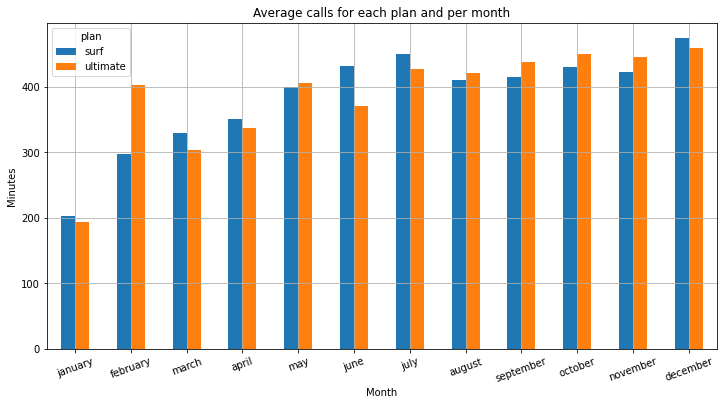

In [38]:
# Crear un grafico de barras par comparar los minutos en promedio para cada mas y para cada plan
calls_groupby_month_plan.plot(kind='bar',
                              xlabel='Month',
                              ylabel='Minutes',
                              title='Average calls for each plan and per month',
                              figsize=(12,6),
                              rot=20,
                              grid=True
                             )

plt.show()

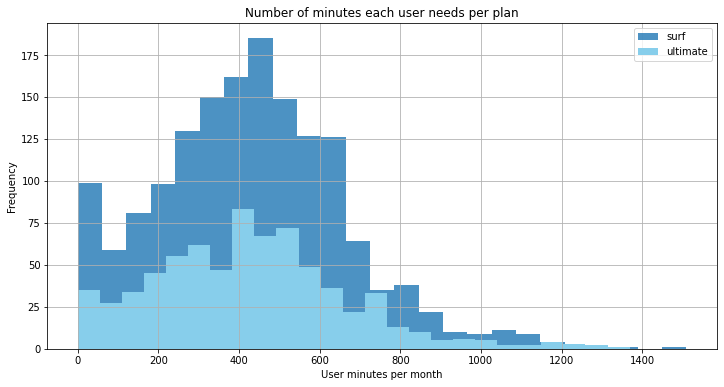

In [39]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Filtrar los usuarios por plan para call_minutes
surf_call_minutes = df_users_plan_per_month[df_users_plan_per_month['plan']=='surf']
ultimate_call_minutes = df_users_plan_per_month[df_users_plan_per_month['plan']=='ultimate']

# Dataframe para el histograma con el plan ultimate
surf_call_minutes['call_minutes'].plot(kind='hist',alpha=0.8, bins=25) 
ultimate_call_minutes['call_minutes'].plot(kind='hist', bins=25, figsize=(12,6), color='skyblue', grid=True)

# Agregar datos adicionales: titulo, nombre del eje x y y 
plt.title('Number of minutes each user needs per plan')
plt.xlabel('User minutes per month')
plt.ylabel('Frequency')
plt.legend(['surf','ultimate'])

plt.show()

In [40]:
# Total de minutos en llamada por mes
df_users_plan_per_month_sum = df_users_plan_per_month.groupby(['month','plan'])['call_minutes'].sum().unstack()
df_users_plan_per_month_sum

plan,surf,ultimate
month,,
1,406,774
2,2673,2822
3,7590,3651
4,17577,7074
5,30768,11781
6,41836,17435
7,54448,25197
8,66438,29922
9,80360,37626


In [41]:
# Calcula la media y la varianza de la duración mensual de llamadas.

# Filtrar por plan
call_minutes_per_month_surf = df_users_plan_per_month_sum['surf']
call_minutes_per_month_ultimate = df_users_plan_per_month_sum['ultimate']

# Calcular la media para cada plan
mu_surf = df_users_plan_per_month_sum['surf'].mean()
mu_ultimate = df_users_plan_per_month_sum['ultimate'].mean()

# calcular la varianza para cada plan
var_surf = np.var(df_users_plan_per_month_sum['surf'])
var_ultimate = np.var(df_users_plan_per_month_sum['ultimate'])

print(f'Para el plan surf: media = {mu_surf}, varianza = {var_surf}')
print(f'Para el plan ultimate: media = {mu_ultimate}, varianza = {var_ultimate}')

Para el plan surf: media = 56201.916666666664, varianza = 2202716344.5763893
Para el plan ultimate: media = 25827.0, varianza = 478462892.0


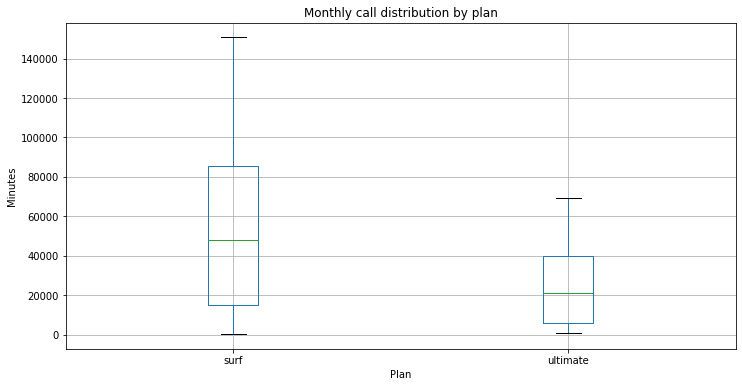

In [42]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

df_users_plan_per_month_sum.boxplot(figsize=(12,6))
plt.title('Monthly call distribution by plan')
plt.xlabel('Plan')
plt.ylabel('Minutes')
plt.show()

**Notas**  
El comportamiento claramente varia de acuerdo al plan.   
- Los usuarios con la tarifa ultimate suelen usar menos minutos en total hasta febrero, a partir de marzo los usuarios surf consumen mas minutos. Esto sucede porque el número de usuarios con la tarifa surf es aprox. 2 veces mayor al de la tarifa ultimate.
- Si analizamos el promedio de minutos por mes y por plan.  
    1. Surf es ligeramente mayor en los meses: enero, marzo, abril, junio, julio y diciembre
    2. Ulimate es superior (25% mayor) que surf en febrero y ligeramente mayor en los demas meses.
- La distribucion de ambas tarifas tienen un comportmiento sesgado hacia la derecha (el bigote superior del boxplot es mas largo que el inferior). 
- La media del plan surf en minutos de llamadas ronda los 56 000, mientras del plan ultimate ronda los 25000. 
- Parece que la tarifa surf tiene mas dispersión de valores, al tener los bigotes mas largos. 
- No se observan valores atipicos. 
- Conforme pasan los meses va aumentndo la demanda. Para diciembre la diferencia de demanda es casi del doble, siendo la tarifa surf la que mas consume (por la existencia de mas usuarios de la tarifa surf).

### Mensajes

In [43]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

# Agrupar los mensajes por mes y plan
df_messages_groupby_month_plan = df_users_plan_per_month.groupby(['month','plan'])['messages'].sum().unstack()
# Renombrar los indices para el mes correspondiente al numero
df_messages_groupby_month_plan.index = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']
#df_messages_groupby_month_plan = df_messages_groupby_month_plan.unstack()
df_messages_groupby_month_plan

plan,surf,ultimate
january,21,62
february,108,151
march,351,243
april,870,463
may,1849,931
june,2454,1379
july,3271,1937
august,4662,2732
september,5968,3259
october,8020,4181


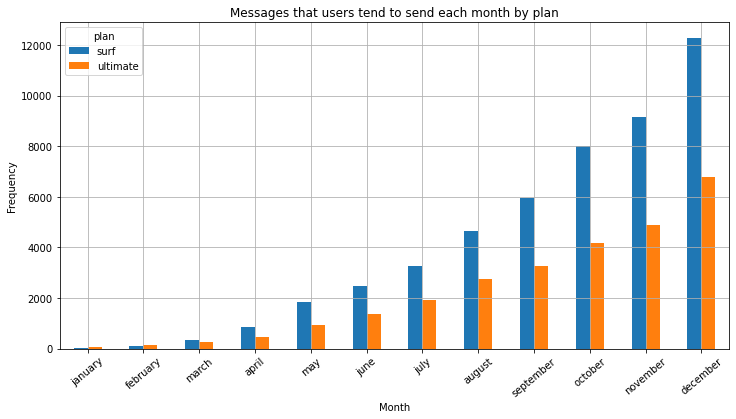

In [44]:
# Grafico de barras para comprarar el numero de mensajes por mes y por plan
df_messages_groupby_month_plan.plot(kind='bar',
                                   rot=40,
                                   grid=True,
                                   figsize=(12,6))
plt.title('Messages that users tend to send each month by plan')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

In [45]:
# Comparar el promedio de llamadas por usuario y por mes
# Agrupar los mensajes por mes y plan
df_messages_groupby_month_plan_mean = df_users_plan_per_month.groupby(['month','plan'])['messages'].mean().unstack()
# Renombrar los indices para el mes correspondiente al numero
df_messages_groupby_month_plan_mean.index = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']
#df_messages_groupby_month_plan = df_messages_groupby_month_plan.unstack()
df_messages_groupby_month_plan_mean

plan,surf,ultimate
january,10.500000,15.500000
february,12.000000,21.571429
march,15.260870,20.250000
april,17.400000,22.047619
may,24.012987,32.103448
june,25.298969,29.340426
july,27.033058,32.830508
august,28.777778,38.478873
september,30.762887,37.895349
october,33.839662,39.443396


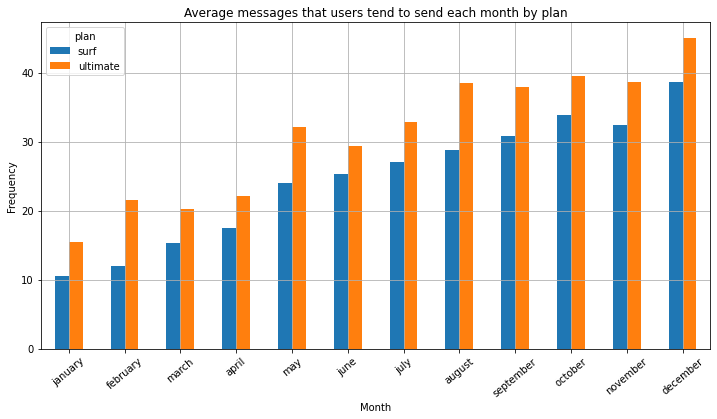

In [46]:
# Grafico de barras para comprarar el promedio de mensajes por mes y por plan
df_messages_groupby_month_plan_mean.plot(kind='bar',
                                   rot=40,
                                   grid=True,
                                   figsize=(12,6))
plt.title('Average messages that users tend to send each month by plan')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

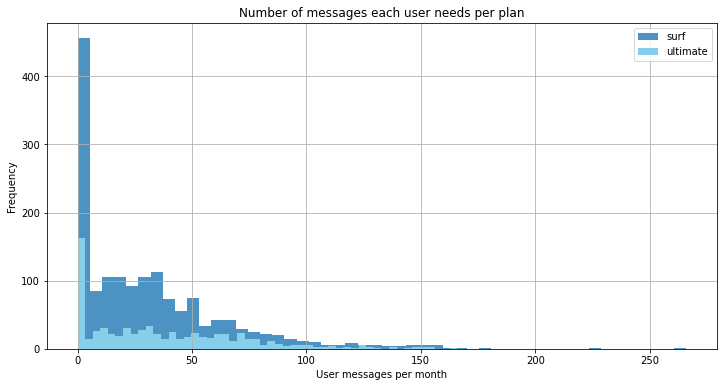

In [47]:
# Compara el número de mensajes mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Filtrar los usuarios por plan para messages
surf_messages = df_users_plan_per_month[df_users_plan_per_month['plan']=='surf']
ultimate_messages = df_users_plan_per_month[df_users_plan_per_month['plan']=='ultimate']

# Dataframe para el histograma con el plan ultimate
surf_messages['messages'].plot(kind='hist',alpha=0.8, bins=50) 
ultimate_messages['messages'].plot(kind='hist', bins=50, figsize=(12,6), color='skyblue', grid=True)

# Agregar datos adicionales: titulo, nombre del eje x y y 
plt.title('Number of messages each user needs per plan')
plt.xlabel('User messages per month')
plt.ylabel('Frequency')
plt.legend(['surf','ultimate'])

plt.show()

In [48]:
# Calcula la media y la varianza de la duración

# Calcular la media para cada plan
mu_surf_messages = df_messages_groupby_month_plan['surf'].mean()
mu_ultimate_messages = df_messages_groupby_month_plan['ultimate'].mean()

# calcular la varianza para cada plan
var_surf_messages = np.var(df_messages_groupby_month_plan['surf'])
var_ultimate_messages = np.var(df_messages_groupby_month_plan['ultimate'])

print(f'Para el plan surf: media = {mu_surf_messages}, varianza = {var_surf_messages}')
print(f'Para el plan ultimate: media = {mu_ultimate_messages}, varianza = {var_ultimate_messages}')

Para el plan surf: media = 4084.5, varianza = 14764949.916666666
Para el plan ultimate: media = 2253.0833333333335, varianza = 4307875.909722221


In [49]:
# Preparar el dataframe para el boxplot
df_messages_boxplot_groupby_plan = df_users_plan_per_month.groupby(['month','plan'])['messages'].sum().unstack()
df_messages_boxplot_groupby_plan

plan,surf,ultimate
month,,
1,21,62
2,108,151
3,351,243
4,870,463
5,1849,931
6,2454,1379
7,3271,1937
8,4662,2732
9,5968,3259


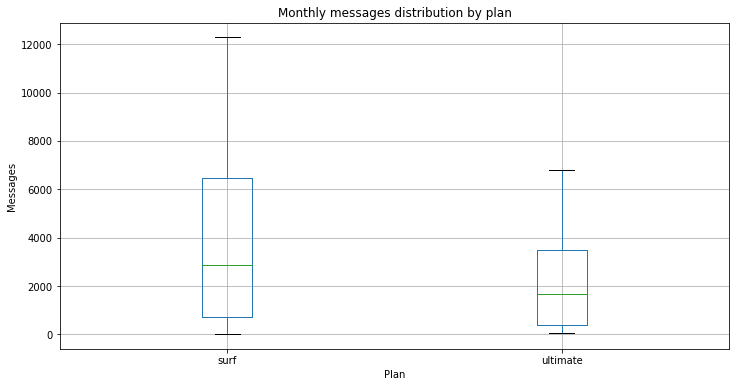

In [50]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

df_messages_boxplot_groupby_plan.boxplot(figsize=(12,6))
plt.title('Monthly messages distribution by plan')
plt.xlabel('Plan')
plt.ylabel('Messages')
plt.show()

**Notas**  
El comportamiento varia de acuerdo al plan. 
- Ambos cojuntos de datos para las dos tarifas, tienen datos sesgados hacia la derecha.
- La media de ultimate esta en 2285 mensajes y la de surf en 4051 mensajes.
- Los usuarios con la tarifa ultimate suelen usar menos minutos en total hasta marzo, a partir de abril los usuarios surf realizan mensajes (solo porque hay 2 veces mas usuarios de la tarifa surf que la de ultimate).
- Al analizar el promedio de mensajes por tarifa se encontro que los usuarios con la tarifa surf, realizan mas mensajes en promedio al mes para todos los meses, desde un 15% a un 80% mas grande en comparación a al promedio de surf. 
- La distribución de ambas tarifas tienen un comporatmiento sesgado hacia la derecha (el bigote superior del boxplot es mas largo que el inferior).
- Parece que la tarifa surf tiene mas dispersión de valores, al tener los bigotes mas largos.
- No se observan valores atipicos.
- Cada mes aumenta la demanda de mensajes. En diciembre la demanda de mensajes de la tarifa surf es casi el doble de la tarifa ultimate.

### Internet

In [51]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

# Agrupar los mb usados por mes y plan
df_internet_groupby_month_plan = df_users_plan_per_month.groupby(['month','plan'])['gb_used'].sum().unstack()
# Renombrar los indices para el mes correspondiente al numero
df_internet_groupby_month_plan.index = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']
# Verificar el dataframe
df_internet_groupby_month_plan

plan,surf,ultimate
january,10,29
february,110,121
march,312,221
april,611,343
may,1087,489
june,1502,725
july,2042,973
august,2735,1267
september,3238,1463
october,4126,1878


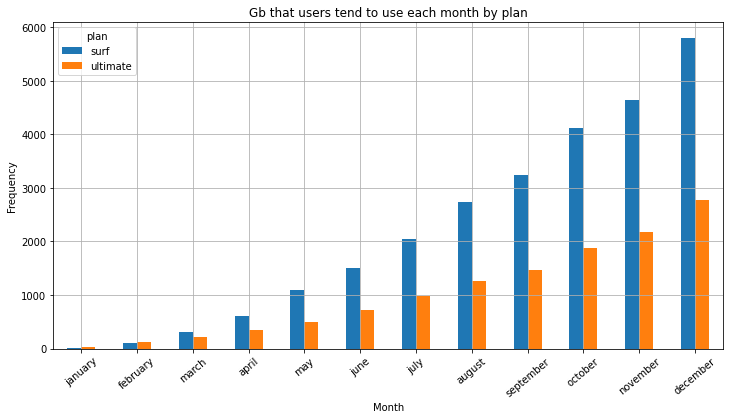

In [52]:
# Grafico de barras para comprarar los mb usados por mes y por plan
df_internet_groupby_month_plan.plot(kind='bar',
                                   rot=40,
                                   grid=True,
                                   figsize=(12,6))
plt.title('Gb that users tend to use each month by plan')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

In [53]:
# Comparar el promedio de mb usados por usuario y por mes
# Agrupar los mb usados por mes y plan
df_internet_groupby_month_plan_mean = df_users_plan_per_month.groupby(['month','plan'])['gb_used'].mean().unstack()
# Renombrar los indices para el mes correspondiente al numero
df_internet_groupby_month_plan_mean.index = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']
# Verificar el dataframe
df_internet_groupby_month_plan_mean

plan,surf,ultimate
january,5.000000,7.250000
february,12.222222,17.285714
march,13.565217,18.416667
april,12.220000,16.333333
may,14.116883,16.862069
june,15.484536,15.425532
july,16.876033,16.491525
august,16.882716,17.845070
september,16.690722,17.011628
october,17.409283,17.716981


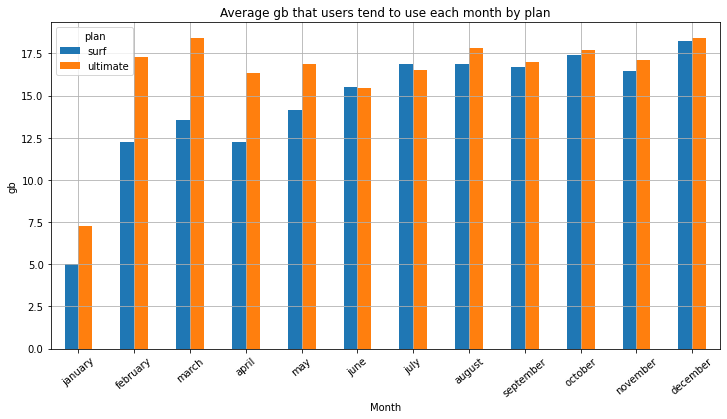

In [54]:
# Grafico de barras para comprarar el promedio de gb por mes y por plan
df_internet_groupby_month_plan_mean.plot(kind='bar',
                                   rot=40,
                                   grid=True,
                                   figsize=(12,6))
plt.title('Average gb that users tend to use each month by plan')
plt.xlabel('Month')
plt.ylabel('gb')
plt.show()

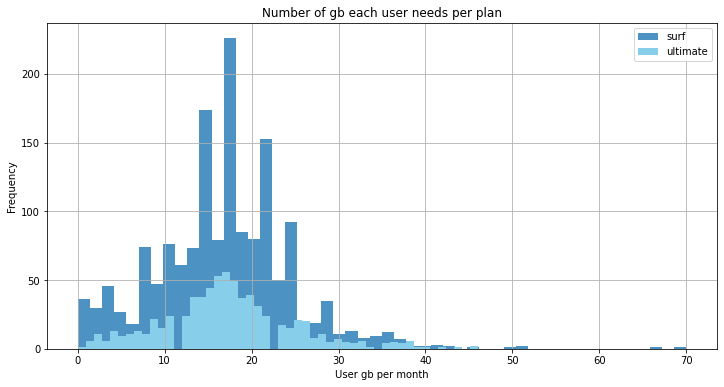

In [55]:
# Compara los gb consumidos por mes que necesitan los usuarios de cada plan. Traza un histograma.

# Filtrar los usuarios por plan para el trafico de internet
surf_internet = df_users_plan_per_month[df_users_plan_per_month['plan']=='surf']
ultimate_internet = df_users_plan_per_month[df_users_plan_per_month['plan']=='ultimate']

# Dataframe para el histograma con el plan ultimate
surf_internet['gb_used'].plot(kind='hist',alpha=0.8, bins=50) 
ultimate_internet['gb_used'].plot(kind='hist', bins=50, figsize=(12,6), color='skyblue', grid=True)

# Agregar datos adicionales: titulo, nombre del eje x y y 
plt.title('Number of gb each user needs per plan')
plt.xlabel('User gb per month')
plt.ylabel('Frequency')
plt.legend(['surf','ultimate'])

plt.show()

In [56]:
# Calcula la media y la varianza de la duración mensual del internet.

# Calcular la media para cada plan
mu_surf_internet = df_internet_groupby_month_plan_mean['surf'].mean()
mu_ultimate_internet = df_internet_groupby_month_plan_mean['ultimate'].mean()

# calcular la varianza para cada plan
var_surf_internet = np.var(df_internet_groupby_month_plan_mean['surf'])
var_ultimate_internet = np.var(df_internet_groupby_month_plan_mean['ultimate'])

print(f'Para el plan surf: media = {mu_surf_internet}, varianza = {var_surf_internet}')
print(f'Para el plan ultimate: media = {mu_ultimate_internet}, varianza = {var_ultimate_internet}')

Para el plan surf: media = 14.594808448923049, varianza = 12.067831312331379
Para el plan ultimate: media = 16.346165106753276, varianza = 8.20141023700356


In [57]:
# Preparar el dataframe para el boxplot
df_internet_boxplot_groupby_plan = df_users_plan_per_month.groupby(['month','plan'])['gb_used'].sum().unstack()
df_internet_boxplot_groupby_plan

plan,surf,ultimate
month,,
1,10,29
2,110,121
3,312,221
4,611,343
5,1087,489
6,1502,725
7,2042,973
8,2735,1267
9,3238,1463


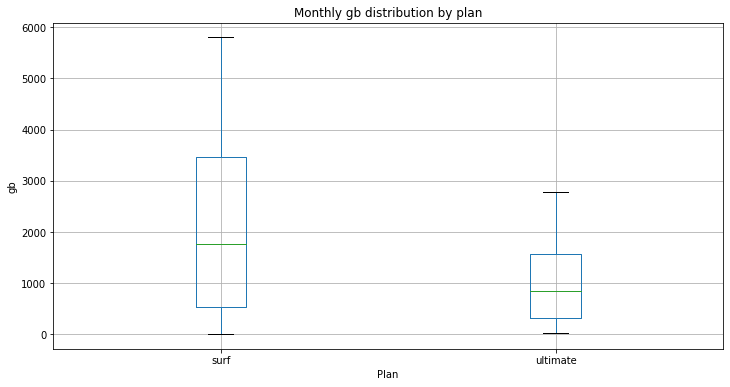

In [58]:
# Trazar un diagrama de caja para visualizar la distribución de la duración mensual del trafico de inernet

df_internet_boxplot_groupby_plan.boxplot(figsize=(12,6))
plt.title('Monthly gb distribution by plan')
plt.xlabel('Plan')
plt.ylabel('gb')
plt.show()

**Notas**  
El comportamiento varia de acuerdo al plan. 
- La media de surf esta en 14.59 gb y la de ultimate en 16.34 gb.
- Los usuarios con la tarifa ultimate suelen usar menos mb en total por mes hasta febrero, a partir de marzo los usuarios surf cosumen mas gb (por ser mas usuarios de la tarifa surf que de la taria ultimate).
- En promedio la tarifa surf consume ligeramente mas gb en los meses de: junio, julio. La tarifa ultimate
    es superior en los otros meses. Para febrero, marzo y abril hay una diferencia significativa de aprox. el 20% mas que la tarifa surf.
- La distribucion de ambas tarifas tienen un comportamiento sesgado hacia la derecha (el bigote superior del boxplot es mas largo que el inferior).
- No se observan valores atipicos.

## Ingreso

In [59]:
# Filtrar los ingresos por el plan surf 
surf_income = df_users_plan_per_month[df_users_plan_per_month['plan']=='surf']['total_price']
# Describir estadisticas del plan surf
surf_income.describe()

count    1573.000000
mean       60.706408
std        55.388042
min        20.000000
25%        20.000000
50%        40.360000
75%        80.360000
max       590.370000
Name: total_price, dtype: float64

In [60]:
# Filtrar los ingresos por el plan ultimate 
ultimate_income = df_users_plan_per_month[df_users_plan_per_month['plan']=='ultimate']['total_price']
# Describir estadisticas del plan surf
ultimate_income.describe()

count    720.000000
mean      72.313889
std       11.395108
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      182.000000
Name: total_price, dtype: float64

**Notas**
- La media de la tarifa surf es de 60.70 usd. La media de la tarifa ultimate es de 72.31 usd.
    Esto quiere decir que los usuarios de la tarifa ultimate en promedio pagan solamente la tarifa mensual, mientras que
    los usuarios de la tarifa surf, tienden a pagar mas por exceso del servicio, casi 3 veces la tarifa mensual. 
    Aun asi el precio en promedio de la tarifa surf es menor a la tarifa ultimate.
    
- La desviacion estandar de la tarifa surf es de 55.38 usd, mientras que la de la tarifa ultimate es de 11.39 usd.
    Los valores estan menos dispersos en la tarifa surf. Los usuarios de la tarifa ultimate suelen ser mas consistentes en lo que gastan mensualmente. 
    
- El 75% de los usuarios de la tarifa ultimate, gastan 70 usd (solamente la tarifa mensual).
- El 25% de los usuarios de la tarifa surf, gastan 20 usd (solamente la tarifa mensual).
- Hay un 25% de usuarios en la tarifa surf que gasta mas del equivalente la tarifa mensual de la tarifa ultimate (70 usd). 
- El maximo de la tarifa para surf es de 590.37 usd comparado con el maximo de la tarifa ultimate 182 usd.
    Los usuarios de surf tienden a gastar mas. 

## Prueba las hipótesis estadísticas

In [61]:
# Prueba las hipótesis

# H0 (Hipótesis nula): Los ingresos promedio procedentes de los usuarios de los planes de llamada son iguales.
# H1 (Hipótesis alternativa): Los ingresos promedio procedentes de los usuarios de los planes de llamada cambian.

# Realizar la prueba de t de Student para dos muestras independientes
test_result = st.ttest_ind(surf_income,ultimate_income)

# Definir el nivel de significancia al 1%
alpha = 0.01

# Comparar la probabilidad (resultado de la prueba) con el nivel de significancia
if alpha > test_result.pvalue:
    print('Rechazamos la hipótesis nula. Hay diferencias significativas en los ingresos promedio')
else:
    print('No hay evidencia para rechazar la hipótesis nula.')

Rechazamos la hipótesis nula. Hay diferencias significativas en los ingresos promedio


**Nota**  
Se rechaza la hipótesis nula. Hay diferencias significativas en los ingresos promedio. 

In [62]:
# Prueba las hipótesis

# H0 (Hipótesis nula): El ingreso promedio de los usuarios del área de NY-NJ es diferentes al de los usuarios de otras regiones.
# H1 (Hipótesis alterntiva): El ingreso promedio de los usuarios del área de NY-NJ es igual al de los usuarios de otras regiones.

# área NY-NJ
area = 'New York-Newark-Jersey City, NY-NJ-PA MSA'

# Filtro de usuarios por área
df_users_nynj = df_users.query("@area in city")

# Usar el id de los usuarios para encontrarlos en el dataframe con los ingresos
df_users_plan_per_month_NYNJ = df_users_plan_per_month.query("user_id in @df_users_nynj['user_id']")
# filtrar para el caso contrario
df_users_plan_per_month_others = df_users_plan_per_month.query("user_id not in @df_users_nynj['user_id']")

df_users_plan_per_month_NYNJ['total_price'].mean()

# Realizar la prueba de t de Student para dos muestras independientes
test_result = st.ttest_ind(df_users_plan_per_month_NYNJ['total_price'],df_users_plan_per_month_others['total_price'])
# Definir el nivel de significancia
alpha = 0.01

if alpha > test_result.pvalue:
    print('Rechazamos la hipótesis nula. Hay diferencias significativas en los ingresos promedio')
else:
    print('No hay evidencia para rechazar la hipótesis nula.')

No hay evidencia para rechazar la hipótesis nula.


In [63]:
# Prueba de dos colas
resultado_prueba = st.ttest_ind(df_users_plan_per_month_NYNJ['total_price'], df_users_plan_per_month_others['total_price'])

# Definir el nivel de significancia
alpha = 0.01

if alpha > resultado_prueba.pvalue:
    print('Rechazamos la hipótesis nula. Hay diferencias significativas en los ingresos promedio')
else:
    print('No hay evidencia para rechazar la hipótesis nula.')

No hay evidencia para rechazar la hipótesis nula.


**Nota**  
No hay evidencia para rechazar la hipótesis nula.

## Recopilación de informes

**Para la lectura de datos**  
- Lectura de datos correctas, no se tuvieron que agregar argumentos adicionales.

**Preprocesamiento de datos**  

**1. Dataframe de las tarifas**
- El dataframe no contiene valores ausentes. 
- Los nombres de las columnas contienen un correcto uso de minúsculas, snake case y son nombres descriptivos.
- Con excepción de la columna plan_name, los tipos de datos son correctos. Se cambio el tipo de dato de la columna plan_name por tipo categórico en vez de un string con apoyo de la método astype(). 
- Hay 8 columnas y 2 filas. 

**2. Dataframe de los usuarios** 
- Las columnas tienen un nombre apropiado: minúsculas, snake_case  y el nombre es descriptivo. 
- La columna reg_date contiene valores de tipo str, al ser fechas se cambiaron por datatime para manipular los datos mas fácil. 
- `Churn_date` contiene 34 valores de 500, la razón fue que los usuarios seguian consumiendo el producto y no habia fecha de vencimiento. 
- `plan` es de tipo str lo cambie por category. Me apoye del método astype(). 
- `churn_date` es de tipo str cuando debería ser datetime. Me apoyare del método to_datetime(). Tambien es necesario eliminar los valores ausentes. Me apoyare del método fillna().
- Hay 8 columnas y 500 filas. 
- Se agrego una columna que indicara el mes de registro, se ingoro el año al ser todos datos del 2018 y el día no era relevante para los calculos.
- Curiosamente hay 10 usuarios que contrataron una tarifa pero no consumieron ningun servicio en ningun mes. 

**3. Dataframe de las llamadas**  
- La columna id parece una composición del user_id + un identificador del mensaje, separados por un guión bajo. 
- Se puede cambiar el tipo de dato de la columna `message_date` de str a datetime. 
- No hay valores ausentes. 
- Los nombres de las columnas cumplen con estar en minúsculas, uso de snake case y son descriptivos. 
- Hay 3 columnas, y 76051 filas. 
- Se añadio una columna con el valor del mes en que se realizo la llamada para calculos posteriores, como la agrupación por mes. 

**4. Dataframe de los mensajes**
- Columnas descriptivas con uso de minúsculas y snake_case.
- La columna id es una composición del user_id y un identificador de sesión de internet, separados por un guión bajo. 
- No hay valores ausentes. 
- La columna session_date tiene el tipo de dato str, puede ser cambiada por datetime. Con el método to_datetime(). 
- Hay 4 columnas y 104825 filas.
- Se añadio una columna con el valor del mes en que se realizo los mensajes para calculos posteriores, como agrupación por mes.

**5. Dataframe del internet**
- Columnas descriptivas con uso de minúsculas y snake_case.
- La columna id es una composición del user_id y un identificador de sesión de internet, separados por un guión bajo. 
- No hay valores ausentes. 
- La columna session_date tiene el tipo de dato str, puede ser cambiada por datetime. Con el método to_datetime(). 
- Hay 4 columnas y 104825 filas.
- Se añadio una columna con el valor del mes en que se realizo los mensajes para calculos posteriores, como agrupación por mes.

**6. Condiciones de las tarifas**  

- Las tarifas se cobran por mes. 
- Estas incluyen cierta cantidad de mensajes, mb para internet y minutos para llamadas.
- Una vez excedidos estos valores hay una tarifa para el exceso de gb de internet, mensajes y llamadas. 
- Solo existen dos planes, surf y ultimate. Ultimate es el plan mas costoso (70 usd) y con mayores beneficios.

**7. Comportamiento del usuario en las llamadas**    
El comportamiento claramente varia de acuerdo al plan.   
- Los usuarios con la tarifa ultimate suelen usar menos minutos en total hasta febrero, a partir de marzo los usuarios surf consumen mas minutos. Esto sucede porque el número de usuarios con la tarifa surf es aprox. 2 veces mayor al de la tarifa ultimate.
- Si analizamos el promedio de minutos por mes y por plan.  
    1. Surf es ligeramente mayor en los meses: enero, marzo, abril, junio, julio y diciembre
    2. Ulimate es superior (25% mayor) que surf en febrero y ligeramente mayor en los demas meses.
- La distribucion de ambas tarifas tienen un comportmiento sesgado hacia la derecha (el bigote superior del boxplot es mas largo que el inferior). 
- La media del plan surf en minutos de llamadas ronda los 56 000, mientras del plan ultimate ronda los 25000. 
- Parece que la tarifa surf tiene mas dispersión de valores, al tener los bigotes mas largos. 
- No se observan valores atipicos. 
- Conforme pasan los meses va aumentndo la demanda. Para diciembre la diferencia de demanda es casi del doble, siendo la tarifa surf la que mas consume (por la existencia de mas usuarios de la tarifa surf).

**8. Comportamiento del usuario en los mensajes**  
El comportamiento varia de acuerdo al plan. 
- Ambos cojuntos de datos para las dos tarifas, tienen datos sesgados hacia la derecha.
- La media de ultimate esta en 2285 mensajes y la de surf en 4051 mensajes.
- Los usuarios con la tarifa ultimate suelen usar menos minutos en total hasta marzo, a partir de abril los usuarios surf realizan mensajes (solo porque hay 2 veces mas usuarios de la tarifa surf que la de ultimate).
- Al analizar el promedio de mensajes por tarifa se encontro que los usuarios con la tarifa surf, realizan mas mensajes en promedio al mes para todos los meses, desde un 15% a un 80% mas grande en comparación a al promedio de surf. 
- La distribución de ambas tarifas tienen un comporatmiento sesgado hacia la derecha (el bigote superior del boxplot es mas largo que el inferior).
- Parece que la tarifa surf tiene mas dispersión de valores, al tener los bigotes mas largos.
- No se observan valores atipicos.
- Cada mes aumenta la demanda de mensajes. En diciembre la demanda de mensajes de la tarifa surf es casi el doble de la tarifa ultimate.

**9. Comporatamiento del usuario en el consumo de internet**  
El comportamiento varia de acuerdo al plan.
- La media de surf esta en 14.59 gb y la de ultimate en 16.34 gb.
- Los usuarios con la tarifa ultimate suelen usar menos mb en total por mes hasta febrero, a partir de marzo los usuarios surf cosumen mas gb (por ser mas usuarios de la tarifa surf que de la taria ultimate).
- En promedio la tarifa surf consume ligeramente mas gb en los meses de: junio, julio. La tarifa ultimate
    es superior en los otros meses. Para febrero, marzo y abril hay una diferencia significativa de aprox. el 20% mas que la tarifa surf.
- La distribucion de ambas tarifas tienen un comportamiento sesgado hacia la derecha (el bigote superior del boxplot es mas largo que el inferior).
- No se observan valores atipicos.

**10. Ingreso**
- La media de la tarifa surf es de 60.70 usd. La media de la tarifa ultimate es de 72.31 usd.
    Esto quiere decir que los usuarios de la tarifa ultimate en promedio pagan solamente la tarifa mensual, mientras que
    los usuarios de la tarifa surf, tienden a pagar mas por exceso del servicio, casi 3 veces la tarifa mensual. 
    Aun asi el precio en promedio de la tarifa surf es menor a la tarifa ultimate.
    
- La desviacion estandar de la tarifa surf es de 55.38 usd, mientras que la de la tarifa ultimate es de 11.39 usd.
    Los valores estan menos dispersos en la tarifa surf. Los usuarios de la tarifa ultimate suelen ser mas consistentes en lo que gastan mensualmente. 
    
- El 75% de los usuarios de la tarifa ultimate, gastan 70 usd (solamente la tarifa mensual).
- El 25% de los usuarios de la tarifa surf, gastan 20 usd (solamente la tarifa mensual).
- Hay un 25% de usuarios en la tarifa surf que gasta mas del equivalente la tarifa mensual de la tarifa ultimate (70 usd). 
- El maximo de la tarifa para surf es de 590.37 usd comparado con el maximo de la tarifa ultimate 182 usd.
    Los usuarios de surf tienden a gastar mas. 

**11. Prueba de hipótesis**  
1. Se analizo el siguiente caso:  
**H0 (Hipótesis nula):** Los ingresos promedio procedentes de los usuarios de los planes de llamada son iguales.  
**H1 (Hipótesis alternativa):** Los ingresos promedio procedentes de los usuarios de los planes de llamada cambian.  
*Se utilizo una prueba t student para comprar si hay diferencias en la media significativas.* 
*El resultado es que hay una diferencia significativa por lo que la hipótesis nula se rechaza. Los ingresos promedio procedentes de los usuarios para cada tarifa son diferentes.* 

2. Se analizo el siguiente caso:  
**H0 (Hipótesis nula):** El ingreso promedio de los usuarios del área de NY-NJ es diferente al de los usuarios de otras regiones.  
**H1 (Hipótesis alternativa):** El ingreso promedio de los usuarios del área de NY-NJ es igual al de los usuarios de otras regiones.  
*Se utilizo una prueba t student para comparar si hay diferencias en la media significativas. No hay evidencia suficiente para rechazar la hipótesis nula. Probablemente hay diferencias del ingreso promedio entre la región NY-NJ y el resto de regiones.*  
*Se utilizo una prueba de dos colas para ver si habia cambios en cualquier dirección y el resultado fue el mismo.* 